In [16]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model
import joblib
from tensorflow.keras.models import load_model
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objs as go

In [17]:
df = pd.read_csv('student_lifestyle_dataset.csv')

In [18]:
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


Epoch 1/25


/home/adam/Desktop/Code/Random/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 8.7684 - mae: 2.9273 - val_loss: 3.4922 - val_mae: 1.7160
Epoch 2/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.4049 - mae: 1.3297 - val_loss: 1.3609 - val_mae: 0.9449
Epoch 3/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1787 - mae: 0.8873 - val_loss: 0.8335 - val_mae: 0.7431
Epoch 4/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7194 - mae: 0.6912 - val_loss: 0.4567 - val_mae: 0.5520
Epoch 5/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3837 - mae: 0.5095 - val_loss: 0.2282 - val_mae: 0.3883
Epoch 6/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1769 - mae: 0.3493 - val_loss: 0.1350 - val_mae: 0.2895
Epoch 7/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1030 - mae: 0.2588 - val_loss: 0.1033 - val_mae: 0.2525
Epoch 8/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0886 - mae: 0.2351 - val_loss: 0.0860 - val_mae: 0.2291
Epoch 9/25
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0750 

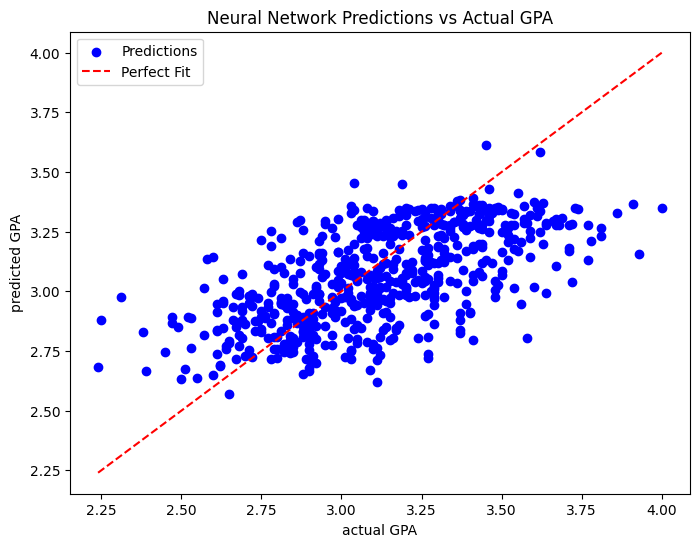

In [19]:
X = df[['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
        'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 
        'Physical_Activity_Hours_Per_Day']].values
y = df['GPA'].values

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#build the model
model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with a single neuron for regression
])

#compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

#train
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=25, 
                    batch_size=8,
                    verbose=1)

#evaluate
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")

#make predictions
y_pred = model.predict(X_test)

#plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.xlabel('actual GPA')
plt.ylabel('predicted GPA')
plt.legend()
plt.title('Neural Network Predictions vs Actual GPA')
plt.show()
